In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.cross_validation import LeaveOneOut


from sklearn.linear_model import Ridge
%matplotlib inline
from matplotlib.pyplot import *

In [2]:
train = pd.read_csv('train.csv', index_col = 0, parse_dates=[1])
test = pd.read_csv('test.csv', index_col = 0, parse_dates=[1])

In [3]:
print "Train Dimensions:"
print train.shape
print "Test Dimensions:"
print test.shape

Train Dimensions:
(137, 42)
Test Dimensions:
(100000, 41)


<h3>EDA on Dataset</h3>

In [4]:
train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


Finding Out whether there is any null value

In [5]:
print train.isnull().any()

Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool


In [6]:
columns = train.columns

for column in columns:
    print column
    print train[column].value_counts()
    print

Open Date
2000-01-07    2
2010-02-23    2
2012-02-02    2
2009-10-16    1
2014-01-25    1
1999-12-18    1
2004-10-13    1
2004-11-13    1
2013-12-21    1
2011-10-14    1
2010-08-23    1
2011-12-29    1
2007-12-01    1
1998-08-12    1
2008-08-12    1
2012-09-26    1
2013-08-09    1
2012-09-09    1
2011-02-09    1
2011-01-18    1
2012-06-08    1
2010-01-25    1
2011-09-27    1
2011-03-11    1
1997-04-10    1
2011-10-04    1
1998-03-14    1
1998-01-28    1
2011-08-30    1
2012-05-22    1
             ..
2008-12-01    1
2006-12-09    1
2013-03-29    1
2009-09-20    1
2010-10-11    1
2009-09-01    1
2012-04-11    1
2011-11-08    1
2013-07-10    1
1998-07-13    1
2010-02-12    1
1996-05-08    1
2011-12-23    1
2007-09-07    1
2009-05-09    1
2012-08-10    1
2005-08-18    1
1999-07-17    1
2009-09-24    1
2011-12-06    1
2007-09-21    1
2008-04-01    1
2008-03-15    1
2007-06-20    1
2006-10-12    1
2011-10-29    1
2008-05-09    1
2010-01-09    1
2009-11-08    1
2012-07-09    1
Name: Open Dat

In [7]:
train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


<b>As seen above there is no null value in train dataset

In [8]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
describe_categorical(train)

,City,City Group,Type
count,137,137,137
unique,34,2,3
top,İstanbul,Big Cities,FC
freq,50,78,76


In [9]:
X_for_eda = train
X_for_eda.drop(["Open Date"], axis=1, inplace=True)
X_for_eda.columns

Index([u'City', u'City Group', u'Type', u'P1', u'P2', u'P3', u'P4', u'P5',
       u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14',
       u'P15', u'P16', u'P17', u'P18', u'P19', u'P20', u'P21', u'P22', u'P23',
       u'P24', u'P25', u'P26', u'P27', u'P28', u'P29', u'P30', u'P31', u'P32',
       u'P33', u'P34', u'P35', u'P36', u'P37', u'revenue'],
      dtype='object')

City


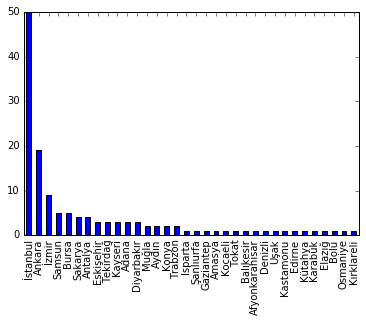


City Group


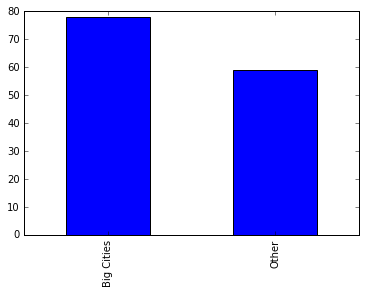


Type


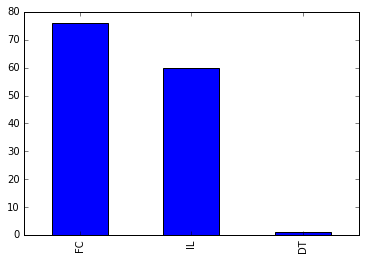


P1


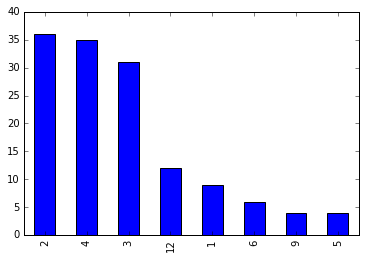


P2


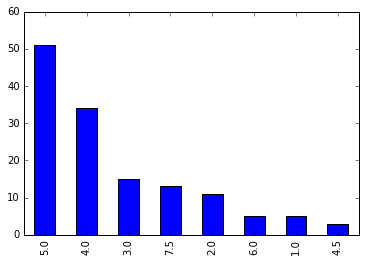


P3


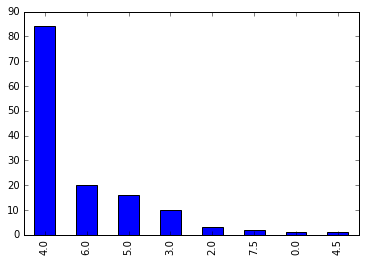


P4


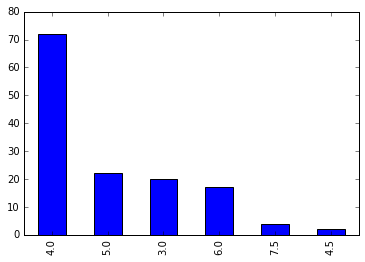


P5


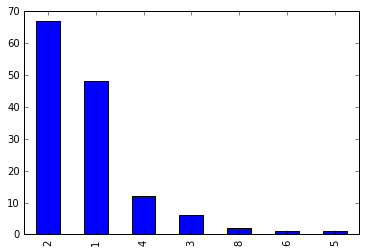


P6


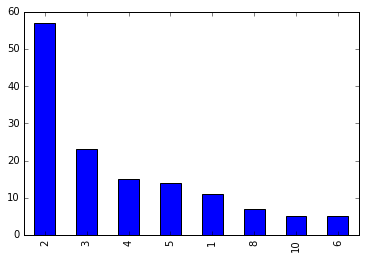


P7


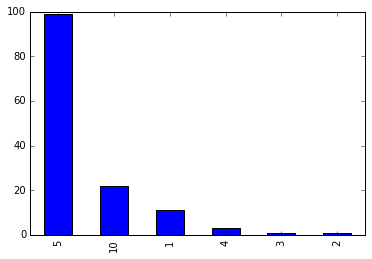


P8


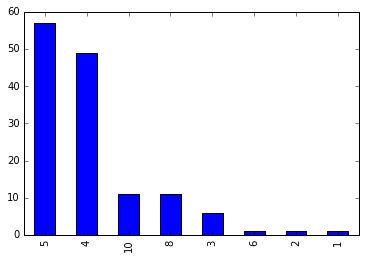


P9


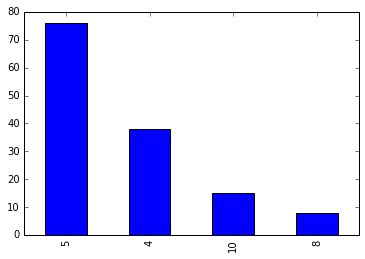


P10


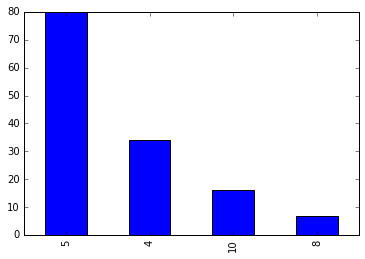


P11


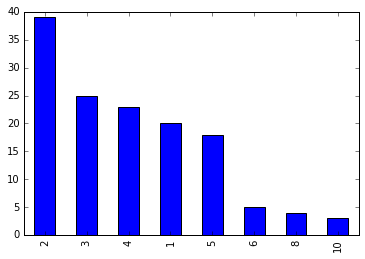


P12


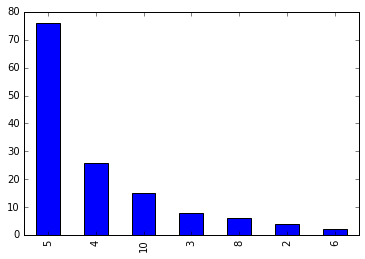


P13


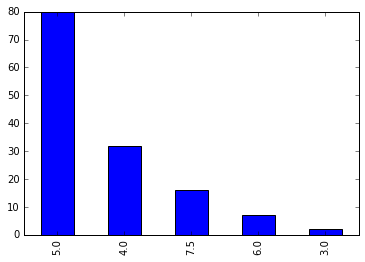


P14


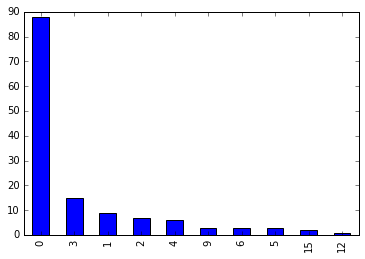


P15


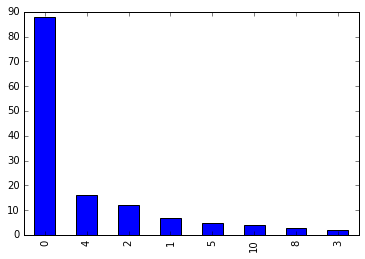


P16


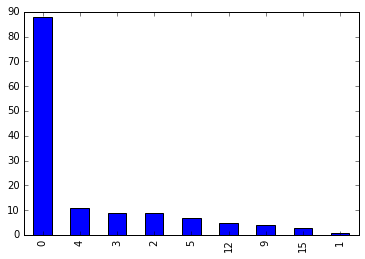


P17


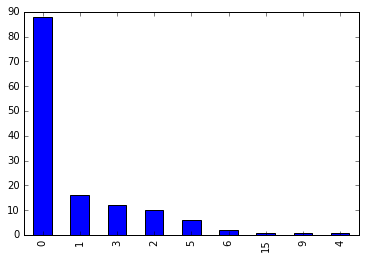


P18


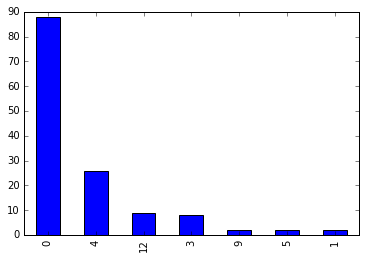


P19


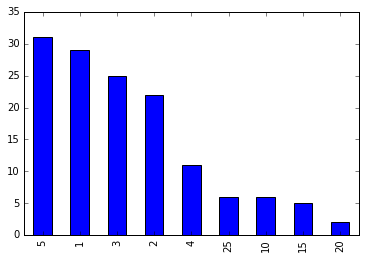


P20


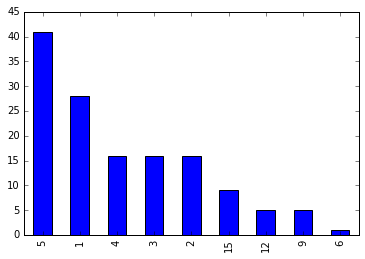


P21


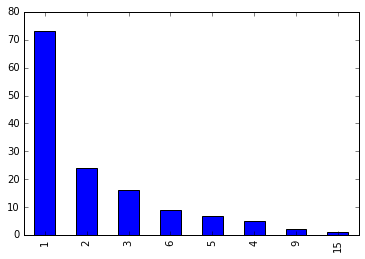


P22


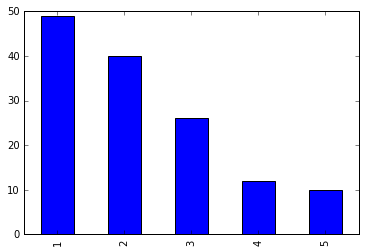


P23


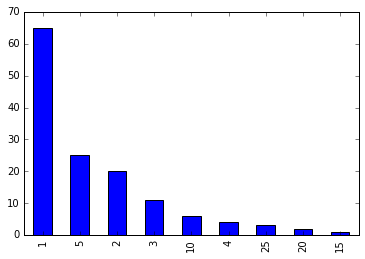


P24


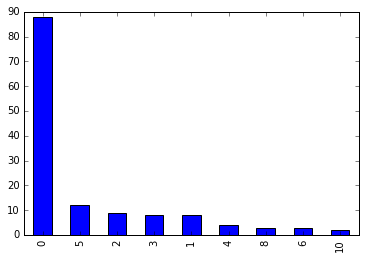


P25


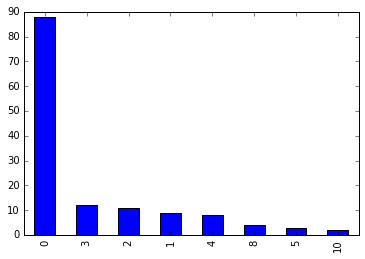


P26


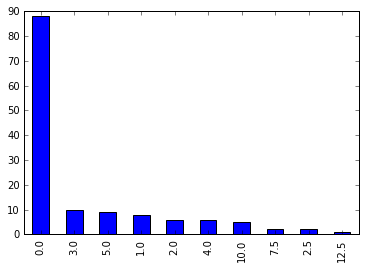


P27


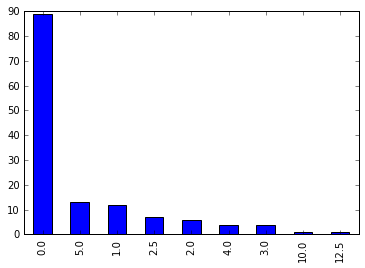


P28


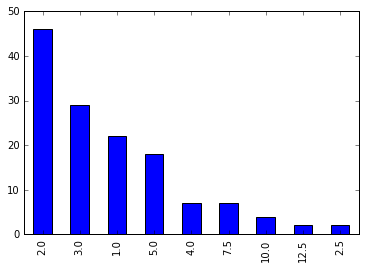


P29


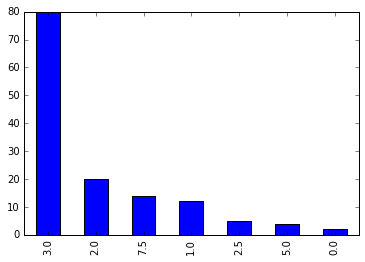


P30


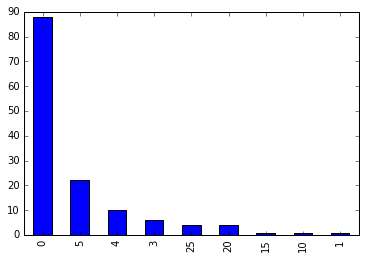


P31


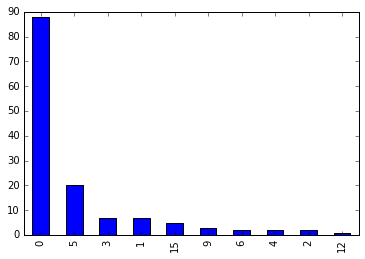


P32


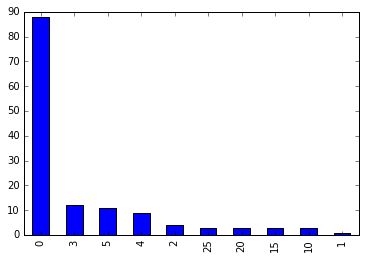


P33


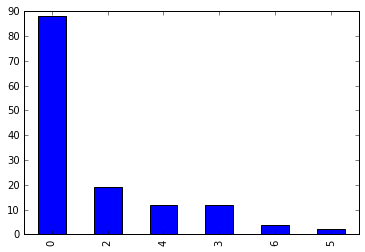


P34


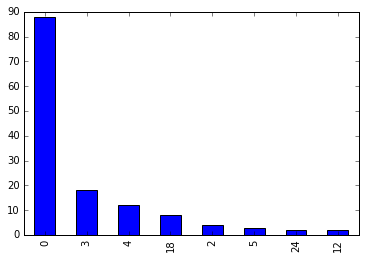


P35


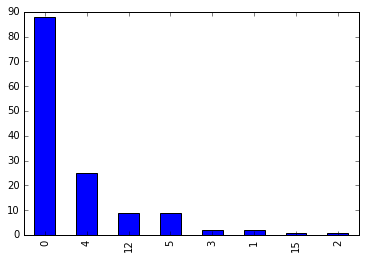


P36


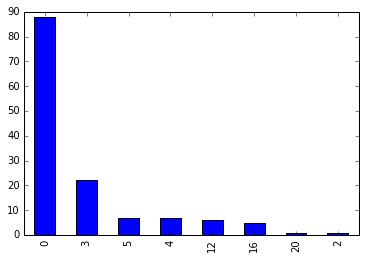


P37


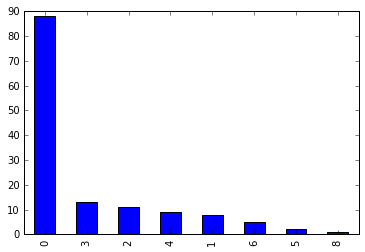


revenue


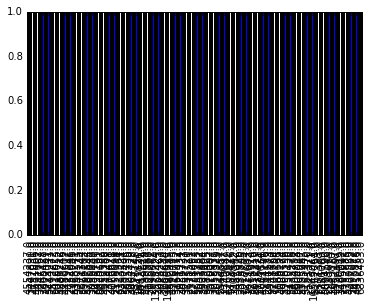

In [10]:
columns = X_for_eda.columns

for column in columns:
    print column
    train[column].value_counts().plot(kind='bar')
    show()
    print

In [11]:
test.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [12]:
print test.isnull().any()

Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
dtype: bool


In [13]:
columns = test.columns

for column in columns:
    print column
    print test[column].value_counts()
    print

Open Date
2013-07-10    645
2013-05-06    635
2011-07-04    635
2013-09-20    632
1996-03-05    631
2009-04-17    625
2012-06-01    615
2012-10-18    607
2011-12-28    601
2010-06-01    597
2013-07-12    594
2007-03-17    354
2013-07-31    353
2005-12-23    353
1999-01-16    352
2008-05-16    352
2012-12-03    349
2013-10-14    349
2005-09-09    347
2009-11-17    346
2008-12-07    345
2013-10-12    343
2008-11-05    343
2010-04-14    343
2011-03-31    343
2012-11-22    342
2007-12-02    341
2012-04-12    341
2000-11-02    340
2011-02-01    339
             ... 
2007-03-18    290
2010-04-08    290
2013-03-06    290
2013-01-03    289
2006-09-26    289
2011-07-15    288
2012-04-04    288
2007-06-27    287
2011-12-31    287
2007-07-20    287
2000-01-01    286
2004-02-19    286
2003-09-26    286
2008-11-25    286
2013-09-09    284
2000-08-26    284
2012-10-15    283
2013-05-02    282
2009-08-28    281
2012-12-04    281
2012-06-05    279
2011-06-24    279
2010-12-28    279
2011-03-07    278


In [14]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
describe_categorical(test)

,City,City Group,Type
count,100000,100000,100000
unique,57,2,4
top,İstanbul,Other,FC
freq,34087,50728,57019


In [15]:
Y_for_eda = test
Y_for_eda.drop(["Open Date"], axis=1, inplace=True)
Y_for_eda.columns

Index([u'City', u'City Group', u'Type', u'P1', u'P2', u'P3', u'P4', u'P5',
       u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14',
       u'P15', u'P16', u'P17', u'P18', u'P19', u'P20', u'P21', u'P22', u'P23',
       u'P24', u'P25', u'P26', u'P27', u'P28', u'P29', u'P30', u'P31', u'P32',
       u'P33', u'P34', u'P35', u'P36', u'P37'],
      dtype='object')

City


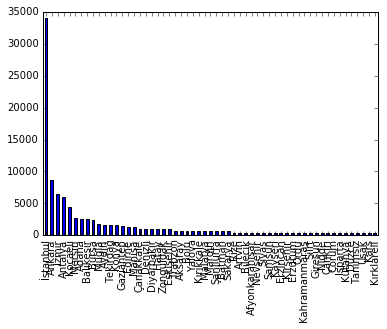


City Group


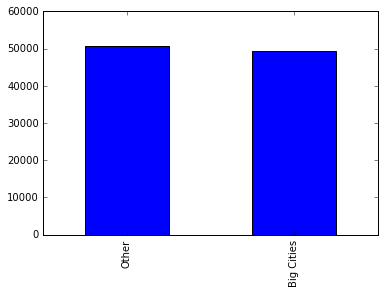


Type


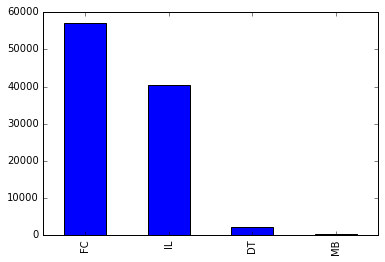


P1


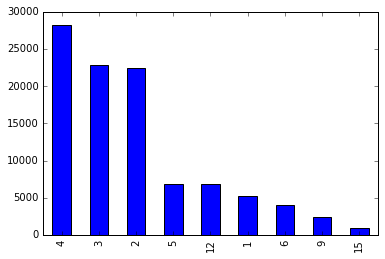


P2


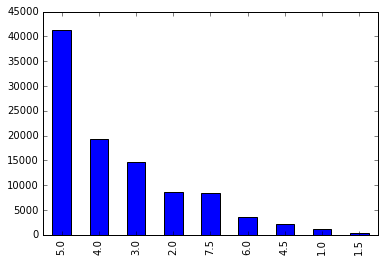


P3


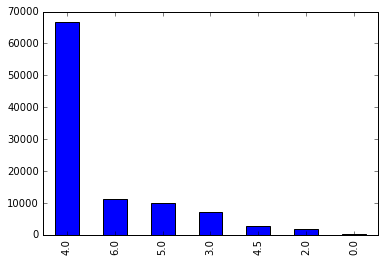


P4


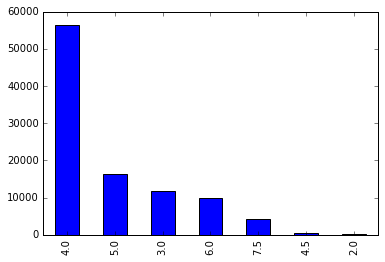


P5


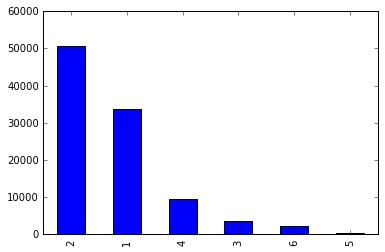


P6


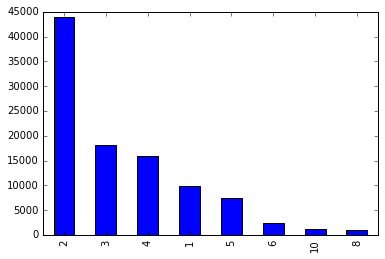


P7


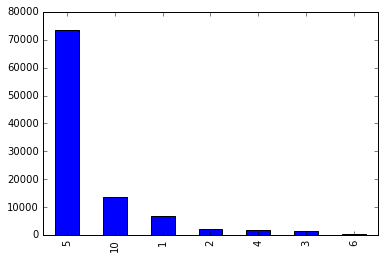


P8


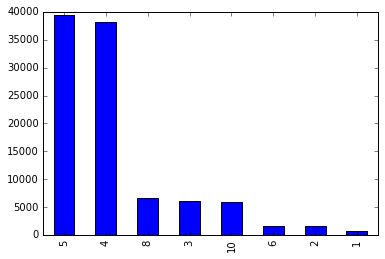


P9


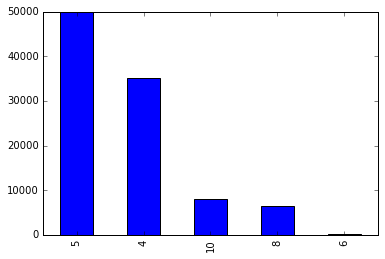


P10


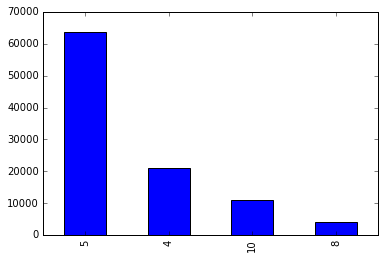


P11


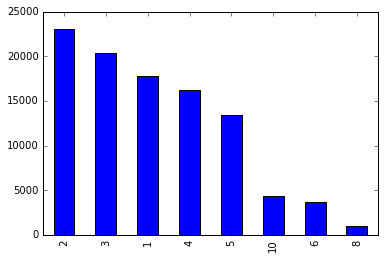


P12


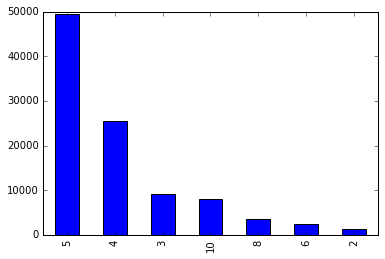


P13


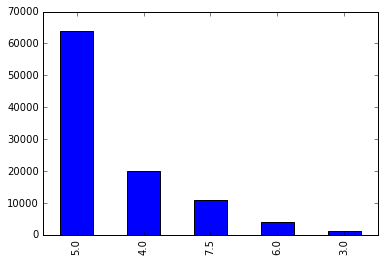


P14


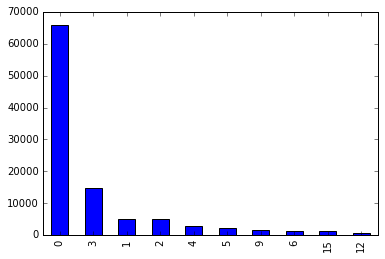


P15


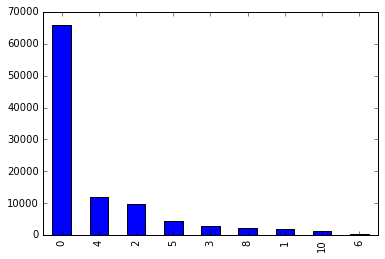


P16


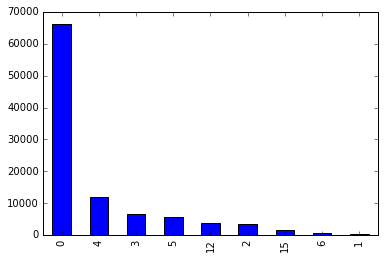


P17


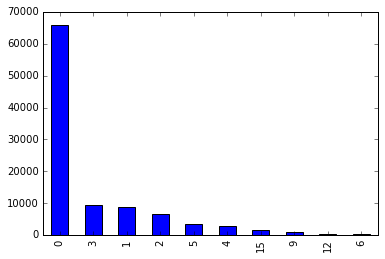


P18


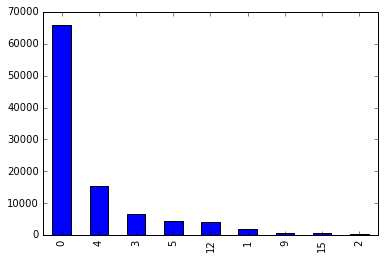


P19


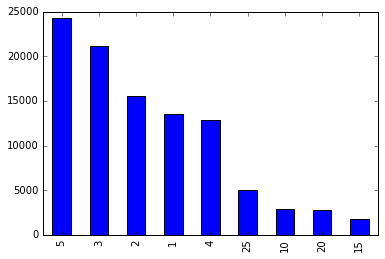


P20


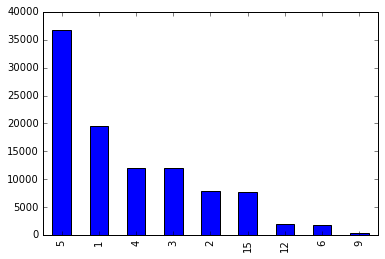


P21


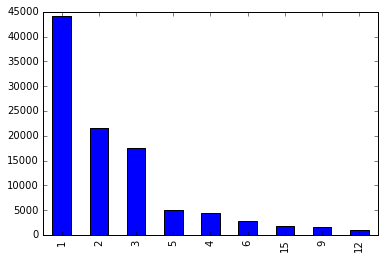


P22


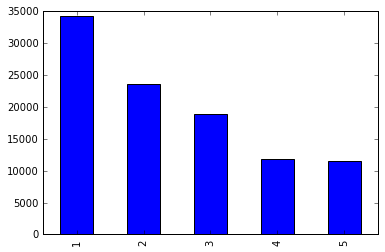


P23


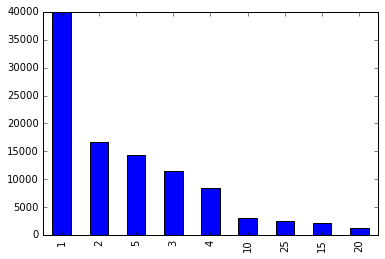


P24


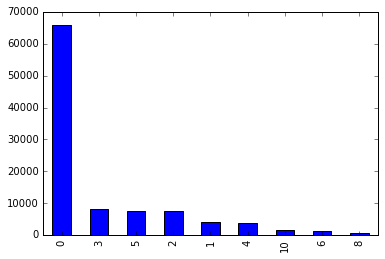


P25


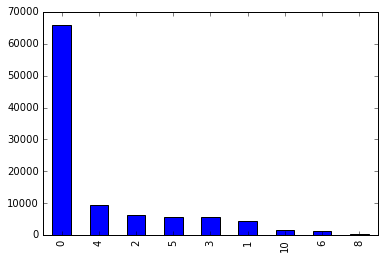


P26


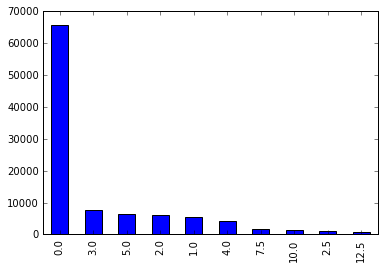


P27


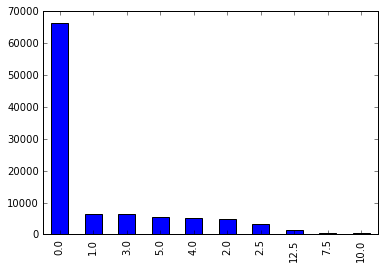


P28


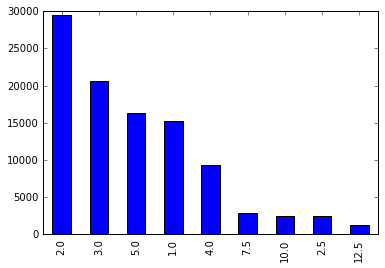


P29


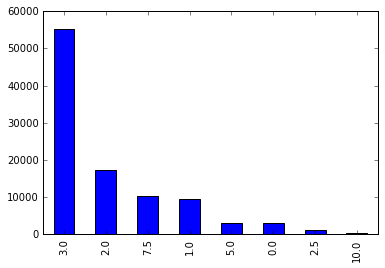


P30


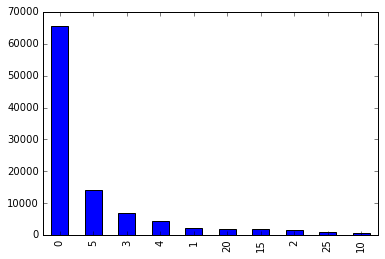


P31


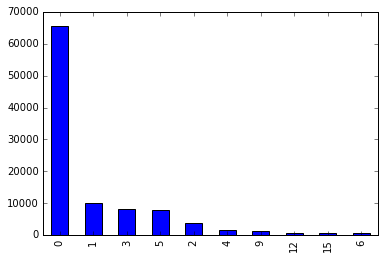


P32


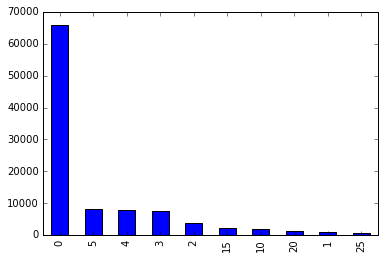


P33


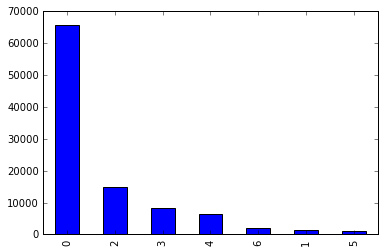


P34


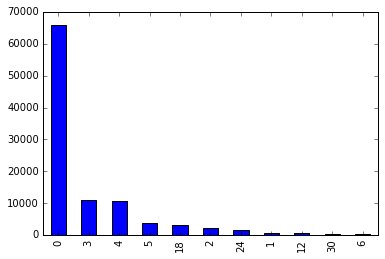


P35


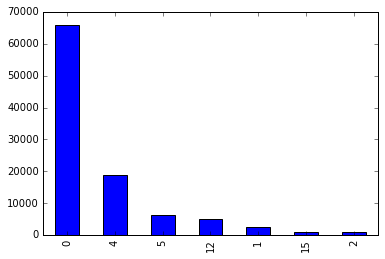


P36


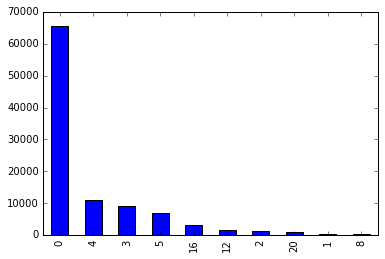


P37


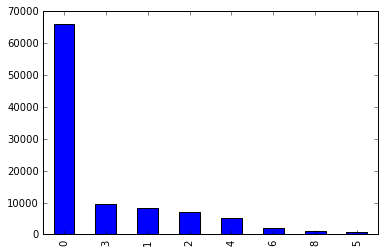

In [16]:
columns = Y_for_eda.columns

for column in columns:
    print column
    test[column].value_counts().plot(kind='bar')
    show()
    print